# THE EASY WAY
importing package cv2 and using it to detect where are faces (works on multiple faces)

In [ ]:
import tkinter as tk
import tkinter.ttk as ttk
import tkinter.font as fnt
from tkinter import filedialog
import cv2


In [ ]:
face_cascade = cv2.CascadeClassifier('haarsascade_frontalface_default.xml')
path = "SampleVideo.mp4"

def AddVideoEvent():
    cap = cv2.VideoCapture(path)
    show_video(cap)

In [ ]:
def show_video(cap):
    while True:
        # Read the frame
        _, img = cap.read()

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect the faces
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)

        # Draw the rectangle around each face
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Display
        cv2.imshow('img', img)

        # Stop if escape key is pressed
        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break
    
    # Release the VideoCapture object
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
AddVideoEvent()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


## THE HARD WAY

now i will try to implement this myself

### 1.1 COLLECTING DATA
for my first try i will collect data out of videos i found online and i captured photos out of them and making labels out of them

In [ ]:
import os
import time
import uuid
import cv2

In [ ]:
IMAGES_PATH = os.path.join('Data','Images')
videos_paths = [os.path.join('DataVideos',f"Video{i}.mp4") for i in range(1,7)]
number_images = 10


In [ ]:

for path in videos_paths:
    cap = cv2.VideoCapture(path)
    i = 0
    for imgnum in range(number_images * 4):
        
        ret, frame = cap.read()
        if i % 4 == 0:
            print('Collecting image {}'.format((imgnum//4))
            imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
            cv2.imwrite(imgname, frame)
            cv2.imshow('frame', frame)

        time.sleep(0.5)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        i += 1
    cap.release()
    cv2.destroyAllWindows()

SyntaxError: '(' was never closed (3776592053.py, line 8)

In [ ]:
!labelme

### 1.2 COLLECTING IMAGES OUT OF UTK DATABASE

i will use opencv library to detect faces out of my database and create labels to work with them later


In [ ]:
import json
from PIL import Image

In [ ]:
def create_labelme_json(label, points, image_path, image_height, image_width):
    points = [[int(x), int(y)] for x, y in points]
    
    return {
        "version": "5.3.1",
        "flags": {},
        "shapes": [
            {
                "label": label,
                "points": points,  # coordinates of the top-left and bottom-right corners
                "group_id": None,
                "shape_type": "rectangle",
                "flags": {}
            },
            # add more shapes if necessary
        ],
        "imagePath": image_path,
        "imageData": None,
        "imageHeight": image_height,
        "imageWidth": image_width
    }

def add_file_to_folder_json(folder, subfolder, filename, data):
    base_name = os.path.splitext(filename)[0]
    # Construct the new file name
    output_file = base_name + '.json'
    
    file_path = os.path.join(folder, subfolder, output_file)
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    
    with open(file_path, 'w') as f:
        json.dump(data, f)

def delete_from_folder(folder,subfolder,filename):
    file_path = os.path.join(folder, subfolder, filename)

    try:
        # Check if the file exists
        if os.path.exists(file_path):
            # Delete the file
            os.remove(file_path)
            print(f"Deleted: {file_path}")
        else:
            print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error deleting file: {e}")

In [ ]:

directoryImages = ".\\UTKData\\Images"
files = os.listdir(directoryImages)

In [ ]:
def get_image_size(file_path):
    # Open the image file
    img = Image.open(file_path)
    # Get the width and height of the image
    width, height = img.size
    return width, height

def save_label(image_path):
    file_path = f".\\UTKData\\Images\\{image_path}"
    img = cv2.imread(file_path)
    width, height = get_image_size(file_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    # Draw the rectangle around each face
    if (len(faces) > 0):
        (x, y, w, h) = faces[0]
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
            
        my_json_file = create_labelme_json("face",[[x, y],[x + w, y + h]], file_path, height, width)
        # print(my_json_file)
        add_file_to_folder_json("UTKData","Labels",image_path,my_json_file)
    # cv2.destroyAllWindows()


In [ ]:
print(files[0])

10_0_0_20170116201102149.jpg


In [ ]:
for file in files:
    save_label(file)

## 2. REVIEW DATASET

In [ ]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
images = tf.data.Dataset.list_files('UTKData\\Images\\*.jpg', shuffle=False)

In [ ]:
images.as_numpy_iterator().next()
images.as_numpy_iterator().next()

b'UTKData\\Images\\10_0_0_20170116201102149.jpg'

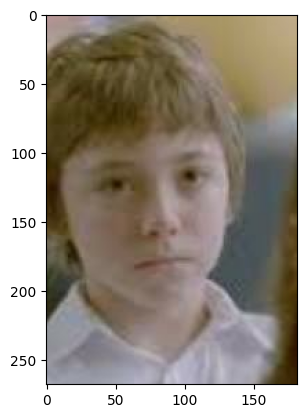

In [ ]:
image_generator = images.as_numpy_iterator()
image = next(image_generator)

plt.imshow(image)
plt.show()

In [ ]:
def load_image_data(x): 
    img = tf.io.decode_jpeg(tf.io.read_file(x))
    return img

In [ ]:
images = images.map(load_image_data)

In [ ]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [ ]:
images.as_numpy_iterator().next()

array([[[187, 153, 154],
        [187, 153, 154],
        [184, 152, 153],
        ...,
        [192, 172, 137],
        [192, 172, 137],
        [192, 172, 137]],

       [[186, 152, 153],
        [186, 152, 153],
        [184, 152, 153],
        ...,
        [191, 171, 136],
        [191, 171, 136],
        [191, 171, 136]],

       [[183, 151, 152],
        [183, 151, 152],
        [183, 151, 152],
        ...,
        [191, 171, 136],
        [191, 171, 136],
        [191, 171, 136]],

       ...,

       [[166, 168, 180],
        [164, 166, 178],
        [161, 163, 175],
        ...,
        [ 59,  36,   4],
        [ 58,  35,   4],
        [ 56,  33,   2]],

       [[168, 170, 182],
        [167, 169, 181],
        [164, 166, 178],
        ...,
        [ 59,  36,   4],
        [ 58,  35,   4],
        [ 56,  33,   2]],

       [[170, 172, 184],
        [169, 171, 183],
        [167, 169, 181],
        ...,
        [ 59,  36,   4],
        [ 58,  35,   4],
        [ 56,  33,   2]]

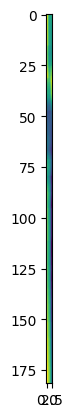

In [ ]:
image_generator = images.as_numpy_iterator()

plot_images = image_generator.next()
plt.imshow(image)
plt.show()



In [ ]:
import os
import shutil
import random

# Define the source directory where all your images are stored.
source_images_dir = ".\\UTKData\\Images"
source_labels_dir = ".\\UTKData\\Labels"

# Define the target directories for train, test, and val.
train_dir = ".\\UTKData\\Train"
test_dir = ".\\UTKData\\Test"
val_dir = ".\\UTKData\\Val"

# Create "Images" and "Labels" subdirectories in the train, test, and val folders.
train_images_dir = os.path.join(train_dir, 'Images')
train_labels_dir = os.path.join(train_dir, 'Labels')
test_images_dir = os.path.join(test_dir, 'Images')
test_labels_dir = os.path.join(test_dir, 'Labels')
val_images_dir = os.path.join(val_dir, 'Images')
val_labels_dir = os.path.join(val_dir, 'Labels')

os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(test_images_dir, exist_ok=True)
os.makedirs(test_labels_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# List all image filenames in the source directory.
all_images = os.listdir(source_images_dir)

# Shuffle the list of image filenames to randomize the distribution.
random.shuffle(all_images)

# Calculate the number of images for each set based on the desired percentages.
total_images = len(all_images)
train_split = int(0.7 * total_images)
test_split = int(0.15 * total_images)
val_split = total_images - train_split - test_split

# Move images and labels to the respective folders.
for i, image in enumerate(all_images):
    label_file = image.replace('.jpg', '.json')  # Assuming the label files have the same name as images with a different extension
    print(os.path.join(source_labels_dir, label_file))
    
    if os.path.exists(os.path.join(source_labels_dir, label_file)):
        if i < train_split:
            shutil.move(os.path.join(source_images_dir, image), os.path.join(train_images_dir, image))
            shutil.move(os.path.join(source_labels_dir, label_file), os.path.join(train_labels_dir, label_file))
        elif i < train_split + test_split:
            shutil.move(os.path.join(source_images_dir, image), os.path.join(test_images_dir, image))
            shutil.move(os.path.join(source_labels_dir, label_file), os.path.join(test_labels_dir, label_file))
        else:
            shutil.move(os.path.join(source_images_dir, image), os.path.join(val_images_dir, image))
            shutil.move(os.path.join(source_labels_dir, label_file), os.path.join(val_labels_dir, label_file))

.\UTKData\Labels\45_1_3_20170119171411898.json
.\UTKData\Labels\88_1_0_20170120230317497.json
.\UTKData\Labels\25_1_3_20170119171925976.json
.\UTKData\Labels\24_1_3_20170119165453847.json
.\UTKData\Labels\54_0_0_20170120223246116.json
.\UTKData\Labels\22_1_3_20170119163028157.json
.\UTKData\Labels\67_0_0_20170120224558687.json
.\UTKData\Labels\34_0_3_20170119160235323.json
.\UTKData\Labels\27_0_3_20170119194352188.json
.\UTKData\Labels\45_0_3_20170119202044372.json
.\UTKData\Labels\25_1_3_20170119195859404.json
.\UTKData\Labels\26_1_3_20170119192843266.json
.\UTKData\Labels\37_0_3_20170119202214518.json
.\UTKData\Labels\67_0_0_20170120225706103.json
.\UTKData\Labels\4_1_0_20170119144520789.json
.\UTKData\Labels\26_0_1_20170116010639525.json
.\UTKData\Labels\60_0_0_20170120222339215.json
.\UTKData\Labels\40_0_0_20170120222008245.json
.\UTKData\Labels\26_0_0_20170119180141460.json
.\UTKData\Labels\67_0_0_20170117163339177.json
.\UTKData\Labels\40_0_3_20170119205507599.json
.\UTKData\Labe

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [ ]:
vgg = VGG16(include_top=False)
vgg.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [ ]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [ ]:
facetracker = build_model()
facetracker.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_4[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d_2 (Gl  (None, 512)                  0         ['vgg16[0][0]']               
 obalMaxPooling2D)                                                                                
                                                                                            

In [ ]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    print([label['class']], label['bbox'])
    return [label['class']], label['bbox']

In [ ]:

train_labels = tf.data.Dataset.list_files('UTKData\\Train\\Labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
train_images = tf.data.Dataset.list_files('UTKData\\Train\\Images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image_data)


In [ ]:
train = tf.data.Dataset.zip((train_images, train_labels))

In [ ]:
X, y = train.as_numpy_iterator().next()

UnknownError: {{function_node __wrapped__IteratorGetNext_output_types_3_device_/job:localhost/replica:0/task:0/device:CPU:0}} KeyError: 'class'
Traceback (most recent call last):

  File "C:\Users\thepo\OneDrive\Pulpit\Uczelnia\IntroductionToMachineLearning\AgeRecognition\my_env\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 268, in __call__
    return func(device, token, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\thepo\OneDrive\Pulpit\Uczelnia\IntroductionToMachineLearning\AgeRecognition\my_env\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 146, in __call__
    outputs = self._call(device, args)
              ^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\thepo\OneDrive\Pulpit\Uczelnia\IntroductionToMachineLearning\AgeRecognition\my_env\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 153, in _call
    ret = self._func(*args)
          ^^^^^^^^^^^^^^^^^

  File "C:\Users\thepo\OneDrive\Pulpit\Uczelnia\IntroductionToMachineLearning\AgeRecognition\my_env\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\thepo\AppData\Local\Temp\ipykernel_12892\2646276240.py", line 5, in load_labels
    print([label['class']], label['bbox'])
           ~~~~~^^^^^^^^^

KeyError: 'class'


	 [[{{node EagerPyFunc}}]] [Op:IteratorGetNext] name: 

## ANOTHER TRY WITH MY FIRST DATASET


In [ ]:
import os
import shutil
import random

# Define the source directory where all your images are stored.
source_images_dir = ".\\Data\\Images"
source_labels_dir = ".\\Data\\Labels"

# Define the target directories for train, test, and val.
train_dir = ".\\Data\\train"
test_dir = ".\\Data\\test"
val_dir = ".\\Data\\val"

# Create "Images" and "Labels" subdirectories in the train, test, and val folders.
train_images_dir = os.path.join(train_dir, 'Images')
test_images_dir = os.path.join(test_dir, 'Images')
val_images_dir = os.path.join(val_dir, 'Images')

os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(test_images_dir, exist_ok=True)
os.makedirs(test_labels_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# List all image filenames in the source directory.
all_images = os.listdir(source_images_dir)

# Shuffle the list of image filenames to randomize the distribution.
random.shuffle(all_images)

# Calculate the number of images for each set based on the desired percentages.
total_images = len(all_images)
train_split = int(0.7 * total_images)
test_split = int(0.15 * total_images)
val_split = total_images - train_split - test_split

# Move images and labels to the respective folders.
for i, image in enumerate(all_images):
    label_file = image.replace('.jpg', '.json')  # Assuming the label files have the same name as images with a different extension
    print(os.path.join(source_labels_dir, label_file))
    
    if i < train_split:
        shutil.move(os.path.join(source_images_dir, image), os.path.join(train_images_dir, image))
    elif i < train_split + test_split:
        shutil.move(os.path.join(source_images_dir, image), os.path.join(test_images_dir, image))
    else:
        shutil.move(os.path.join(source_images_dir, image), os.path.join(val_images_dir, image))

.\Data\Labels\4f49cb3b-6bfc-11ee-9e0f-3c7c3f256693.json
.\Data\Labels\6ca41e66-6bfc-11ee-b3d6-3c7c3f256693.json
.\Data\Labels\41c31597-6bfc-11ee-be7d-3c7c3f256693.json
.\Data\Labels\569c60cd-6bfc-11ee-b8b1-3c7c3f256693.json
.\Data\Labels\29d40d31-6bfc-11ee-90fd-3c7c3f256693.json
.\Data\Labels\5565d96a-6bfc-11ee-a00d-3c7c3f256693.json
.\Data\Labels\65450d86-6bfc-11ee-92fc-3c7c3f256693.json
.\Data\Labels\4e0a4272-6bfc-11ee-9b22-3c7c3f256693.json
.\Data\Labels\3742c2bf-6bfc-11ee-bc90-3c7c3f256693.json
.\Data\Labels\31246824-6bfc-11ee-b144-3c7c3f256693.json
.\Data\Labels\704c0370-6bfc-11ee-bb11-3c7c3f256693.json
.\Data\Labels\39b22ab4-6bfc-11ee-bd7e-3c7c3f256693.json
.\Data\Labels\3cdd2f21-6bfc-11ee-9f7a-3c7c3f256693.json
.\Data\Labels\3394bad7-6bfc-11ee-9d9d-3c7c3f256693.json
.\Data\Labels\590d9911-6bfc-11ee-af87-3c7c3f256693.json
.\Data\Labels\443f5a18-6bfc-11ee-852c-3c7c3f256693.json
.\Data\Labels\6680205c-6bfc-11ee-999a-3c7c3f256693.json
.\Data\Labels\4a60dbdd-6bfc-11ee-9d1b-3c7c3f2566

In [ ]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('Data', folder, 'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('Data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('Data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath) 

## AUGMENTATION

In [ ]:
import albumentations as alb

In [ ]:
augmentor = alb.Compose([alb.RandomCrop(width=338, height=338), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [ ]:

with open(os.path.join('Data', 'val', 'labels', '2d7da60a-6bfc-11ee-913d-3c7c3f256693.json'), 'r') as f:
    label = json.load(f)

In [ ]:
label['shapes'][0]['points']

[[248.7037037037037, 30.462962962962905],
 [430.18518518518516, 261.0185185185185]]

In [ ]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]
coords

[248.7037037037037, 30.462962962962905, 430.18518518518516, 261.0185185185185]

In [ ]:
coords = list(np.divide(coords, [640,360,640,360]))
coords

[0.38859953703703703,
 0.08461934156378585,
 0.6721643518518519,
 0.725051440329218]

In [ ]:
img = cv2.imread(os.path.join('Data','val', 'images','2d7da60a-6bfc-11ee-913d-3c7c3f256693.jpg'))
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
augmented['bboxes'][0][2:]
augmented['bboxes']

[(0.09971509971509969,
  0.09012710935787842,
  0.6366425597194829,
  0.7722441376287529)]

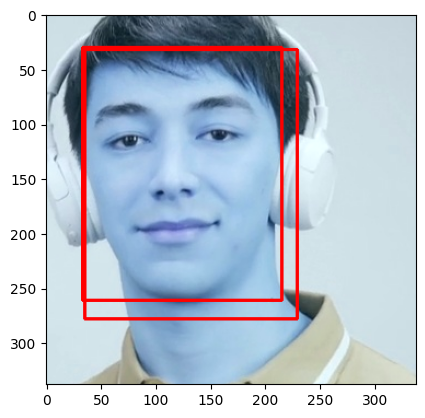

In [ ]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [338,338]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [338,338]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# gites

In [ ]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('Data', partition, 'images')):
        img = cv2.imread(os.path.join('Data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('Data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            
            coords = list(np.divide(coords, [label['imageWidth'],label['imageHeight'],label['imageWidth'],label['imageHeight']]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('AugData', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('AugData', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)


In [ ]:
train_images = tf.data.Dataset.list_files('AugData\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image_data)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)
test_images = tf.data.Dataset.list_files('AugData\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image_data)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)
val_images = tf.data.Dataset.list_files('AugData\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image_data)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)
train_images.as_numpy_iterator().next()

array([[[0.83565354, 0.81996727, 0.82388884],
        [0.82960784, 0.81960785, 0.8235294 ],
        [0.827451  , 0.81960785, 0.8235294 ],
        ...,
        [0.26759806, 0.21269609, 0.21269609],
        [0.25862488, 0.19980137, 0.21156608],
        [0.27957368, 0.23251484, 0.24035798]],

       [[0.8378767 , 0.8221904 , 0.826112  ],
        [0.83559066, 0.8255907 , 0.8295123 ],
        [0.8342157 , 0.82637256, 0.83029413],
        ...,
        [0.28530222, 0.23040028, 0.22079243],
        [0.24385059, 0.19807115, 0.1923849 ],
        [0.26774192, 0.22068311, 0.22068311]],

       [[0.8290836 , 0.8212405 , 0.82516205],
        [0.8352941 , 0.827451  , 0.83137256],
        [0.8392157 , 0.83137256, 0.8352941 ],
        ...,
        [0.29583296, 0.24485259, 0.22132318],
        [0.28227136, 0.2391341 , 0.22344783],
        [0.27544838, 0.23231111, 0.22446798]],

       ...,

       [[0.84898835, 0.8333021 , 0.83722365],
        [0.8525205 , 0.83683425, 0.8407558 ],
        [0.85310465, 0

In [ ]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [ ]:
train_labels = tf.data.Dataset.list_files('AugData\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
test_labels = tf.data.Dataset.list_files('AugData\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
val_labels = tf.data.Dataset.list_files('AugData\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.6475 , 0.04913, 1.     , 0.696  ], dtype=float16))

In [ ]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [ ]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.02606, 0.339  , 0.6094 , 1.     ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.1932 , 0.195  , 0.74   , 0.887  ],
        [0.116  , 0.1316 , 0.828  , 0.9863 ],
        [0.6    , 0.1359 , 1.     , 0.744  ],
        [0.4575 , 0.05243, 0.9697 , 0.7373 ],
        [0.5444 , 0.0989 , 1.     , 0.7563 ],
        [0.1092 , 0.04715, 0.635  , 0.7285 ]], dtype=float16))

## 1. Preparig data

In [ ]:
#imports
import os
import time
import uuid
import cv2
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')
len(gpus)

0

### 1.1 Loading images form dataset

In [ ]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
img_size = 120

In [ ]:
#loading images from datasets
train_images = tf.data.Dataset.list_files('CamData\\AugData\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (img_size,img_size)))
train_images = train_images.map(lambda x: x/255)

In [ ]:
test_images = tf.data.Dataset.list_files('CamData\\AugData\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (img_size,img_size)))
test_images = test_images.map(lambda x: x/255)

In [ ]:
val_images = tf.data.Dataset.list_files('CamData\\AugData\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (img_size,img_size)))
val_images = val_images.map(lambda x: x/255)

In [ ]:
train_images.as_numpy_iterator().next()

array([[[0.0000000e+00, 8.3823532e-02, 1.9607843e-01],
        [4.9019610e-03, 8.7561272e-02, 2.1844363e-01],
        [0.0000000e+00, 7.0588239e-02, 2.0294118e-01],
        ...,
        [7.9411767e-02, 7.1568631e-02, 1.5637255e-01],
        [6.9117650e-02, 7.9901963e-02, 1.5490197e-01],
        [6.4767160e-02, 7.5919114e-02, 1.5533088e-01]],

       [[9.8039221e-04, 9.0870097e-02, 2.0637254e-01],
        [4.9019611e-04, 8.5784316e-02, 2.3174019e-01],
        [0.0000000e+00, 7.7512257e-02, 2.2389705e-01],
        ...,
        [7.0098042e-02, 6.3725494e-02, 1.4607844e-01],
        [7.1017154e-02, 7.3651962e-02, 1.5300246e-01],
        [6.9240198e-02, 7.5612746e-02, 1.6286765e-01]],

       [[1.1090687e-02, 8.5600488e-02, 2.1501225e-01],
        [1.4093138e-03, 7.5919114e-02, 2.0189951e-01],
        [1.1335785e-02, 8.5845590e-02, 2.1182598e-01],
        ...,
        [7.0098042e-02, 7.7941179e-02, 1.6029412e-01],
        [6.6666670e-02, 7.4509807e-02, 1.6470589e-01],
        [6.3848041e-02

### 1.2 Loading labels

In [ ]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [ ]:
train_labels = tf.data.Dataset.list_files('CamData\\AugData\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
val_labels = tf.data.Dataset.list_files('CamData\\AugData\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
test_labels = tf.data.Dataset.list_files('CamData\\AugData\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.03445, 0.0974 , 0.6997 , 0.947  ], dtype=float16))

### 1.3 Combine images and labels

In [ ]:
train_set_size = len(train_images)
val_set_size = len(val_images)
test_set_size = len(test_images)

In [ ]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(train_set_size)
train = train.batch(8)
train = train.prefetch(4)

In [ ]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(val_set_size)
val = val.batch(8)
val = val.prefetch(4)

In [ ]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(test_set_size)
test = test.batch(8)
test = test.prefetch(4)

In [ ]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.1298, 0.3218, 0.4644, 0.719 ],
        [0.3037, 0.3467, 0.5913, 0.6875],
        [0.4204, 0.3096, 0.801 , 0.7637],
        [0.    , 0.2418, 0.2041, 1.    ],
        [0.2021, 0.0828, 0.737 , 0.763 ],
        [0.1392, 0.2322, 0.5405, 0.688 ],
        [0.5513, 0.3086, 0.8857, 0.706 ],
        [0.2266, 0.2046, 0.6377, 0.7007]], dtype=float16))

### 1.4 Display example images with labels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


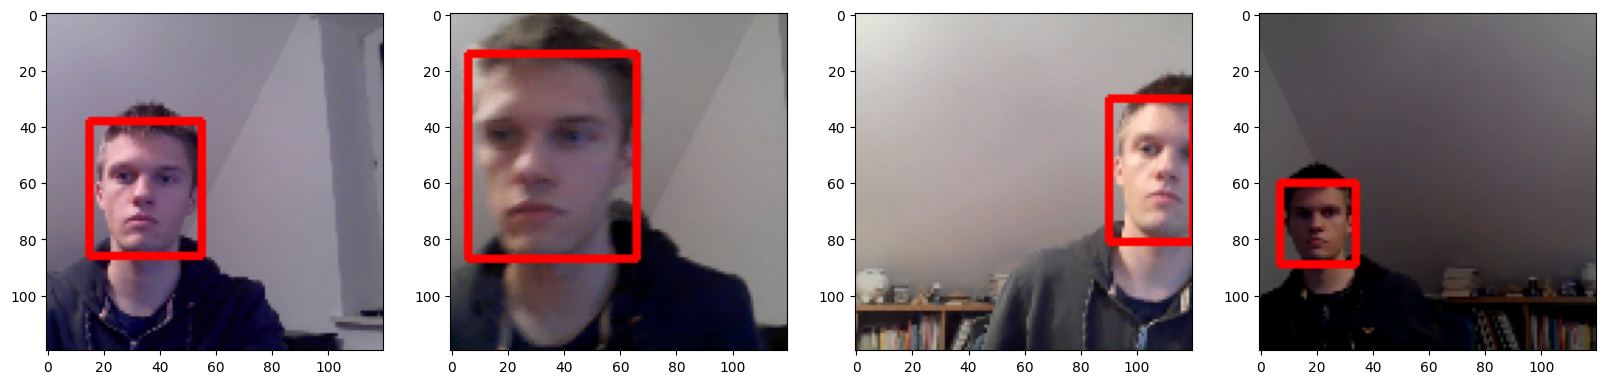

In [ ]:
data_samples = train.as_numpy_iterator()
res = data_samples.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [img_size,img_size]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [img_size,img_size]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

## 2. Building model

In [ ]:
vgg = VGG16(include_top=False)

In [ ]:
def build_model(): 
    input_layer = Input(shape=(img_size,img_size,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [ ]:
facetracker = build_model()

In [ ]:
facetracker.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_4[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d_2 (Gl  (None, 512)                  0         ['vgg16[0][0]']               
 obalMaxPooling2D)                                                                                
                                                                                            

In [ ]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, weight_decay=lr_decay) 
#zamieniłem decay na weight_decay (decay było przestarzałe), nwm co to robi ale nie wywala errora

In [ ]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [ ]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

#### Custom model class

In [ ]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [ ]:
model = FaceTracker(facetracker)
model.compile(opt, classloss, regressloss)

### 1.2 Training model

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
630/630 [==============================] - 1152s 2s/step - total_loss: 0.3068 - class_loss: 0.0909 - regress_loss: 0.2614 - val_total_loss: 1.2989 - val_class_loss: 0.5295 - val_regress_loss: 1.0341
Epoch 2/5
630/630 [==============================] - 1267s 2s/step - total_loss: 0.0944 - class_loss: 0.0274 - regress_loss: 0.0807 - val_total_loss: 0.1770 - val_class_loss: 0.0089 - val_regress_loss: 0.1726
Epoch 3/5
630/630 [==============================] - 988s 2s/step - total_loss: 0.1065 - class_loss: 0.0284 - regress_loss: 0.0923 - val_total_loss: 0.0354 - val_class_loss: 4.9459e-04 - val_regress_loss: 0.0352
Epoch 4/5
630/630 [==============================] - 904s 1s/step - total_loss: 0.0682 - class_loss: 0.0259 - regress_loss: 0.0552 - val_total_loss: 0.0231 - val_class_loss: 0.0102 - val_regress_loss: 0.0180
Epoch 5/5
630/630 [==============================] - 882s 1s/step - total_loss: 0.0796 - class_loss: 0.0286 - regress_loss: 0.0653 - val_total_loss: 0.1434 - val_

## Short test

1/1 [==============================] - 0s 494ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


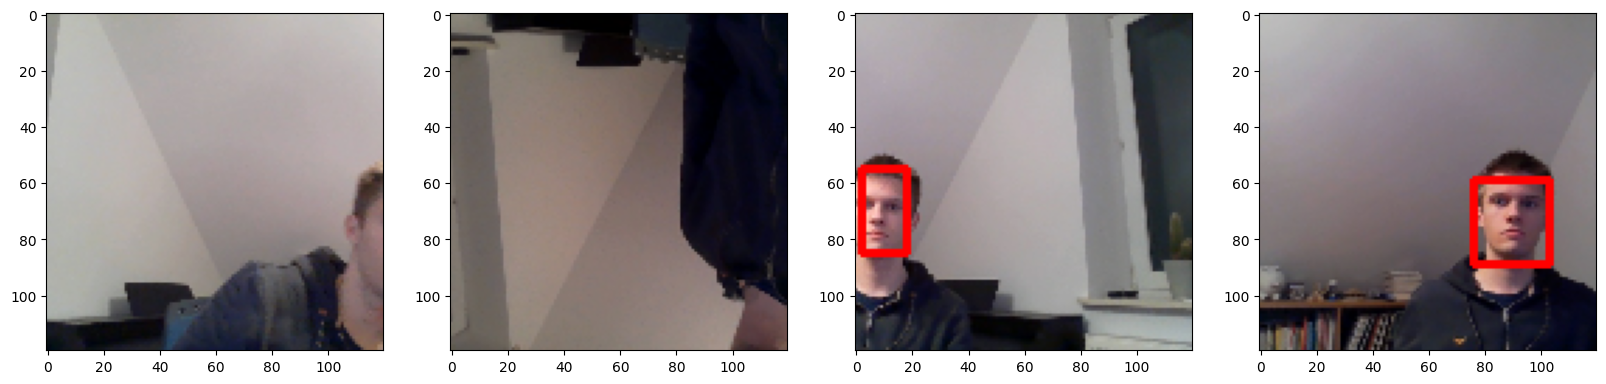

In [ ]:
test_data = test.as_numpy_iterator()
test_sample = test_data.next()
yhat = facetracker.predict(test_sample[0])
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [img_size,img_size]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [img_size,img_size]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### Saving model

In [ ]:
from tensorflow.keras.models import load_model
facetracker.save('facetracker.keras')

### Loading model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
facetracker = load_model('facetracker.keras')

### Realtime testing

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 56ms/step


### Collecting data

In [ ]:
import os
import time
import uuid
import cv2

In [ ]:
IMAGES_PATH = os.path.join('CamData', 'data', 'images')
number_images = 30

In [ ]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\micha\.labelmerc


### Augmented data

In [ ]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[]

In [ ]:
images = tf.data.Dataset.list_files('CamData\\data\\images\\*.jpg')
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img
images = images.map(load_image)

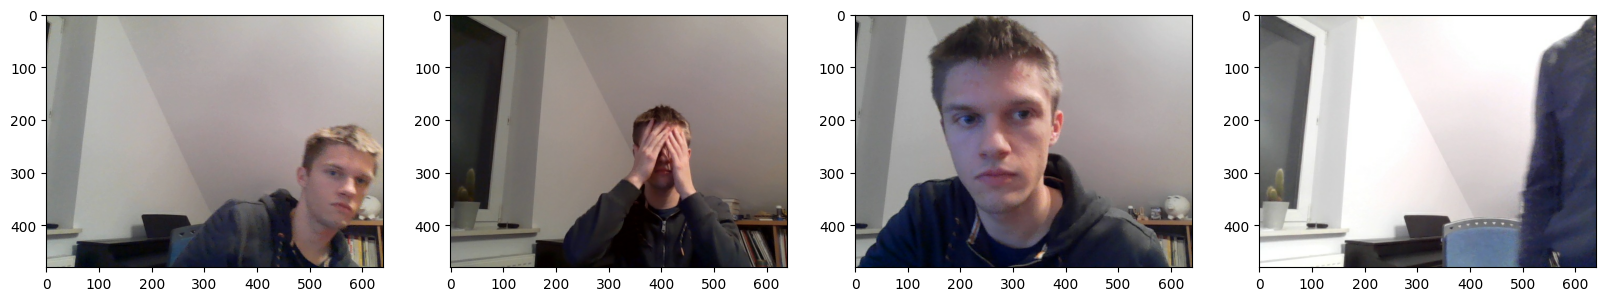

In [ ]:
image_generator = images.batch(4).as_numpy_iterator()
plot_images = image_generator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [ ]:
120*.7 # 84 to train
120*.15 # 18 to validate and test

18.0

In [ ]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('CamData', 'data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('CamData', 'data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('CamData', 'data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)     

### Augmenting data

In [ ]:
import albumentations as alb

In [ ]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [ ]:
img = cv2.imread(os.path.join('CamData', 'data','train', 'images','0efe9071-7fdd-11ee-b2b1-ec773ba9cb5a.jpg'))
with open(os.path.join('CamData', 'data', 'train', 'labels', '0efe9071-7fdd-11ee-b2b1-ec773ba9cb5a.json'), 'r') as f:
    label = json.load(f)
label['shapes'][0]['points']

[[343.05555555555554, 145.83333333333334],
 [493.61111111111114, 324.72222222222223]]

In [ ]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]
coords
img_width = 640
img_height = 480
coords = list(np.divide(coords, [img_width,img_height,img_width,img_height]))
coords

[0.5360243055555556,
 0.3038194444444445,
 0.7712673611111112,
 0.6765046296296297]

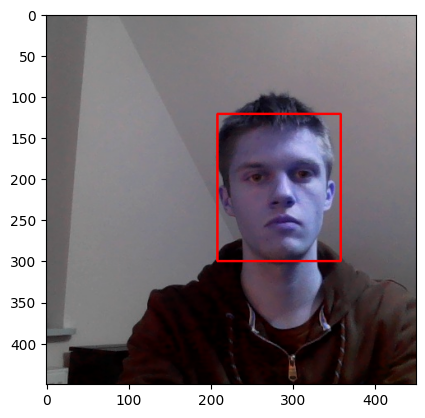

In [ ]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
augmented['bboxes'][0][2:]
augmented['bboxes']
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

#### Pipeline

In [ ]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('CamData', 'data', partition, 'images')):
        img = cv2.imread(os.path.join('CamData', 'data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('CamData', 'data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [img_width,img_height,img_width,img_height]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('CamData', 'AugData', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('CamData', 'AugData', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)